<a href="https://colab.research.google.com/github/MPR-GH/PRLM/blob/master/ch01_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

<table class="tfo-notebook-buttons" align="left">
  
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/MPR-GH/PRLM/blob/master/ch01_Introduction.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

Edited by Mihir Rana

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# You need to adjust the directory names below for your own account
# e.g. you may elect to create ms-notebooks dir or not

# Execute this cell once

# 1. Download the repo and set it as the current directory
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks
!git clone https://github.com/pantelis/PRML
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML

# 2. install the project/module
!python setup.py install



/content/drive/My Drive/Colab Notebooks/ml-notebooks
fatal: destination path 'PRML' already exists and is not an empty directory.
/content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML
running install
running bdist_egg
running egg_info
writing prml.egg-info/PKG-INFO
writing dependency_links to prml.egg-info/dependency_links.txt
writing requirements to prml.egg-info/requires.txt
writing top-level names to prml.egg-info/top_level.txt
writing manifest file 'prml.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying prml/linear/ridge_regression.py -> build/lib/prml/linear
copying prml/preprocess/polynomial.py -> build/lib/prml/preprocess
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/prml
copying build/lib/prml/__init__.py -> build/bdist.linux-x86_64/egg/prml
creating build/bdist.linux-x86_64/egg/prml/bayesnet
copying build/lib/prml/bayesnet/probability_function.py -> build/bdist.linux-x86_

In [34]:
# 3. Add the project directory to the path
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML
import os, sys
sys.path.append(os.getcwd())

/content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML


In [35]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()


In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import PolynomialFeature
from prml.linear import (
    LinearRegression,
    RidgeRegression,
    BayesianRegression
)

np.random.seed(1234)

## 1.1. Example: Polynomial Curve Fitting

<h2> The RMSE loss function. </h2>
The Root Mean Square Error (RMSE) is a loss function and a measure of how accurate the hypothesis is to the training data. It accomplishes this by taking the sum of the difference of a point at the hypothesis and test data and then squaring it, dividing it by the total number, and taking the root. Compared to the Mean Squared Error (MSE), RMSE serves as a direct measure since the RMSE is more in line with the original data set, whereas the MSE would be something significantly higher than most of the values in the dataset. Compared to other loss functions, like the Mean Absolute Error (MAE), the RMSE and the MSE show the impact of outliers greater due to the square factor of these loss functions.

The cell below defines $p_{data}(y|x)$ and generates the $\hat p_{data}(y|x)$

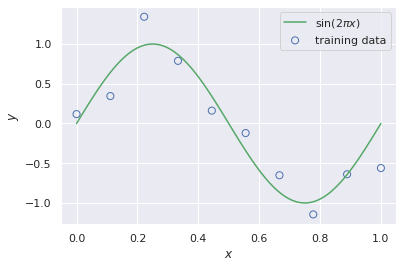

In [37]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size) # p(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape) 
    return x, y

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

M - 0
   Weight(s) : 
     [-0.03592087]
   Full Polynomial : 
     y = -0.03592087311169418
   Squared Norm (given by ||w|| = sqrt(w_1^2 + w_2^2 ... + w_n^2)): 
     |w| = 0.03592087311169418
     |w|^2 = 0.001290309125106434
M - 1
   Weight(s) : 
     [ 0.78301942 -1.63788059]
   Full Polynomial : 
     y = 0.7830194231723844 + -1.637880592568158x^1 
   Squared Norm (given by ||w|| = sqrt(w_1^2 + w_2^2 ... + w_n^2)): 
     |w| = 1.8154261903411646
     |w|^2 = 3.295772252576634
M - 3
   Weight(s) : 
     [ 1.13336032e-02  9.29216157e+00 -2.67894422e+01  1.70372865e+01]
   Full Polynomial : 
     y = 0.011333603222680925 + 9.292161573204558x^1  + -26.789442211208684x^2  + 17.03728652095905x^3 
   Squared Norm (given by ||w|| = sqrt(w_1^2 + w_2^2 ... + w_n^2)): 
     |w| = 33.08002027112505
     |w|^2 = 1094.2877411380443
M - 6
   Weight(s) : 
     [ 8.70379766e-02 -2.36304892e+00  9.45228619e+01 -4.28174943e+02
  7.36797688e+02 -5.63095549e+02  1.61694460e+02]
   Full Polynomial : 
  

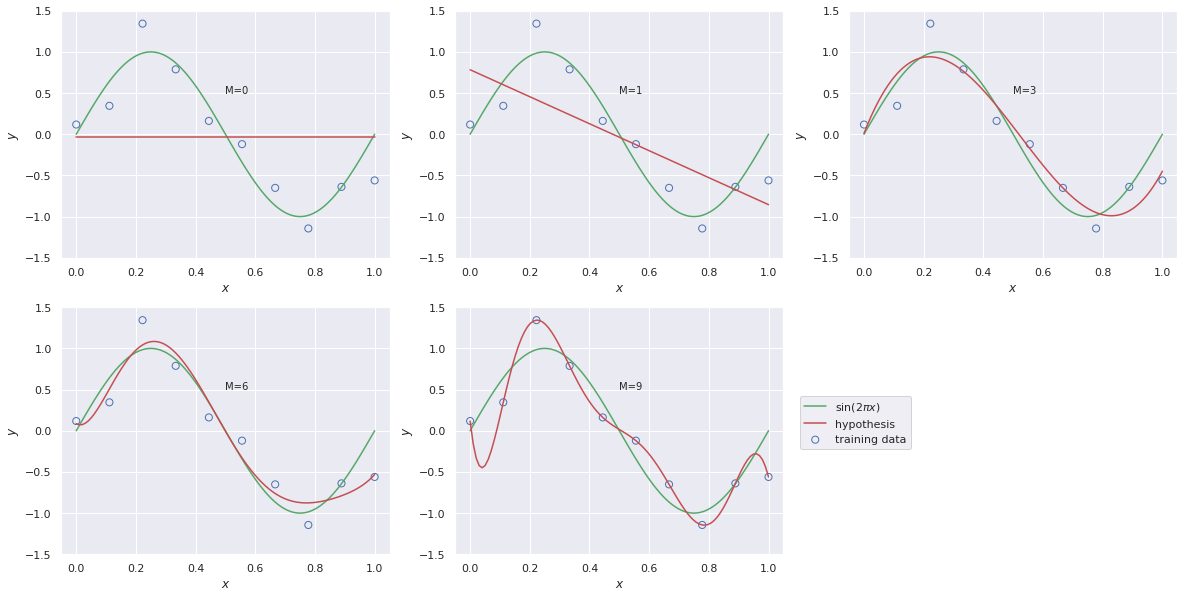

In [71]:
plt.subplots(figsize=(20, 10))
for i, degree in enumerate([0, 1, 3, 6, 9]):
    plt.subplot(2, 3, i + 1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)

    print("M - {}".format((degree)))
    print("   Weight(s) : ")
    print("     {}".format(model.w))
    print("   Full Polynomial : ")
    string = str(model.w[0])
    for length in range(1, degree + 1):
      string = string + " + " + str(model.w[length]) + "x^{} ".format(length)
    print("     y = " + string)
    sum = 0
    for i in range(len(model.w)):
      sum += model.w[i]**2
    print("   Squared Norm (given by ||w|| = sqrt(w_1^2 + w_2^2 ... + w_n^2)): ")
    print("     |w| = " + str(sum ** 0.5))
    print("     |w|^2 = " + str((sum ** 0.5)**2))
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="hypothesis")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(0.5, 0.5))
    plt.xlabel('$x$')
    plt.ylabel('$y$') 
print("-------------------------------------------------------")
print("I am observing that the squared norm |w| is always larger")
print("in magnitude than respective weights for that model. ")
print("-------------------------------------------------------")
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

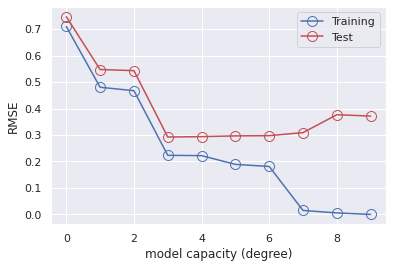

In [68]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()

<h2>Test Error of M=3 vs M=9</h2>
The M=3 and M=9 plots are shown two plots above, and the error to model complexity plot is shown above. One thing to note in comparison is that M=3 has a significantly lower error when compared to M=9. This is because M=3 has a better general curve for when testing at points that aren't the training data points. For example, the hypothesis for M=3 at x=0.05 is much closer to the actual value than for M=9 at x=0.05. This is represented in the RMSE to model complexity graph above, where we can see that generally, the error for M=3 is low because the model is closer to actual values. The error for M=9 is high because outliers exist more frequently from the hypothesis to values we are trying to predict.

#### Regularization

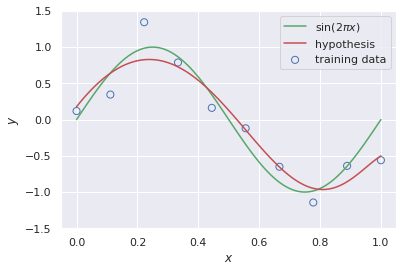

In [66]:
feature = PolynomialFeature(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

#y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="hypothesis")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.show()

<h2>Explanation of Output</h2>
Regularization is meant to closer align the complex model to something that suits the needs to predict values properly. In the above plot, M=9 is plotted, but the hypothesis is much closer to the actual prediction line than what M=9 was beforehand. In the code block below, I have set a single plot to show regularization for all complexities (M=0,1,3,6,9) to show better how they are much closer aligned to the actual prediction values than before.

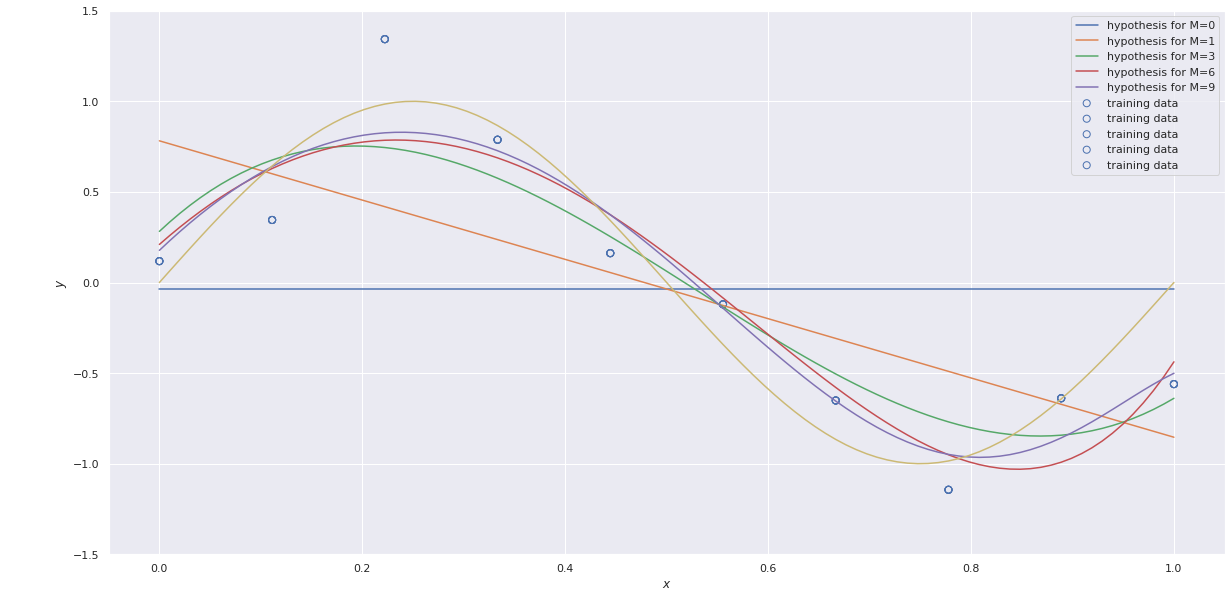

In [67]:
plt.subplots(figsize=(20, 10))
for i, degree in enumerate([0,1,3,6,9]):
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = RidgeRegression(alpha=1e-3)
    model.fit(X_train, y_train)
    y = model.predict(X_test)

    #y = model.predict(X_test)
    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y, label="hypothesis for M={}".format(degree))
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
    plt.xlabel('$x$')
    plt.ylabel('$y$')
plt.plot(x_test, y_test, c="y", label="$\sin(2\pi x)$")
plt.show()

<h2>Plot of RMSE vs Model Complexity with regularization</h2>
Below is the plot. The plot's idea with regularization is that the error (red line) has a lower error at higher complexities and is closer to the training point (blue line). The plot should generally be correct with the idea of regularization because the error is substantially lower than the error in the RMSE vs. Model Complexity without regularization plot shown before.

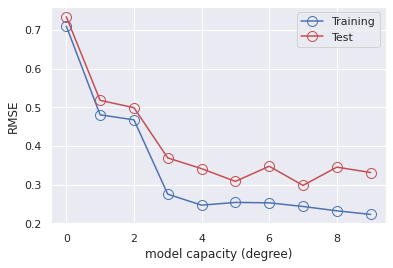

In [69]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = RidgeRegression(alpha=1e-3)
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()

### 1.2.6 Bayesian curve fitting

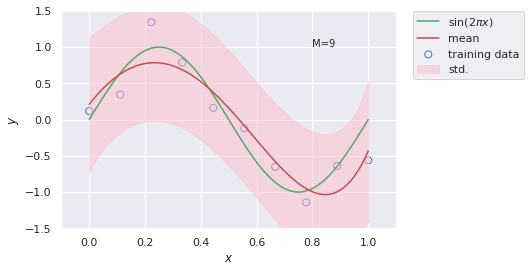

In [41]:
model = BayesianRegression(alpha=2e-3, beta=2)
model.fit(X_train, y_train)

y, y_err = model.predict(X_test, return_std=True)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="mean")
plt.fill_between(x_test, y - y_err, y + y_err, color="pink", label="std.", alpha=0.5)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(0.8, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)
plt.show()